In [1]:
import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from lmc.experiment_config import Trainer
from lmc.utils.setup_training import setup_loader


def show_imgs(imgs, labels, rows=1, cols=16, **kwargs):
    imgs = imgs.transpose(1, 3).transpose(1, 2)
    mins = torch.min(imgs.reshape(-1, 3), dim=0).values
    maxs = torch.max(imgs.reshape(-1, 3), dim=0).values
    imgs = (imgs - mins) / (maxs - mins)
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    if rows == 1:
        axes = [axes]
    plt.axis("off")
    i = 0
    for axrow in axes:
        for ax in axrow:
            ax.imshow(imgs[i])
            # ax.set_title(f"{i} {labels[i]}")
            i += 1
    fig.suptitle(str(kwargs))
    plt.show()


def sample_dl(
    hflip=False,
    random_rotation=0,
    random_translate=0,
    cutout=0,
    random_crop=False,
    seed=99,
):
    kwargs = dict(
        hflip=hflip,
        random_rotation=random_rotation,
        random_translate=random_translate,
        cutout=cutout,
        random_crop=random_crop,
    )
    config = Trainer.from_dict(
        dict(
            path="/home/devin/e/mila_mirror/data/cifar10",
            n_models=1,
            training_steps="1ep",
            model_name="resnet20-32",
            dataset="cifar10",
            **kwargs,
        )
    )
    dl = setup_loader(config.data, train=True, evaluate=False, loader_seed=seed)
    images, labels = next(iter(dl))
    show_imgs(images, labels, **kwargs)
    return images, labels

/home/devin/e/mila_mirror/proj/2025-gsa-lmc/lmc/.venv/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/devin/e/mila_mirror/proj/2025-gsa-lmc/lmc/.venv/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change acco

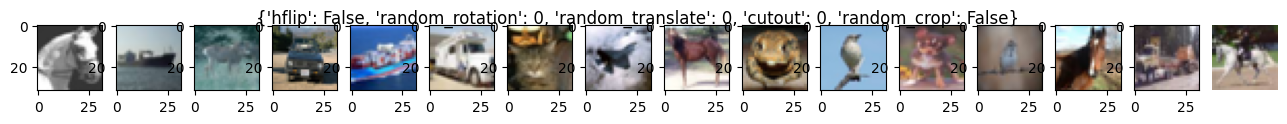

no augmentation


In [2]:
sample_dl()
print("no augmentation")

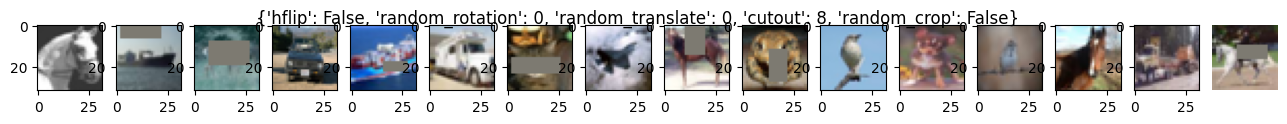

cutout


In [3]:
sample_dl(cutout=8)
print("cutout")

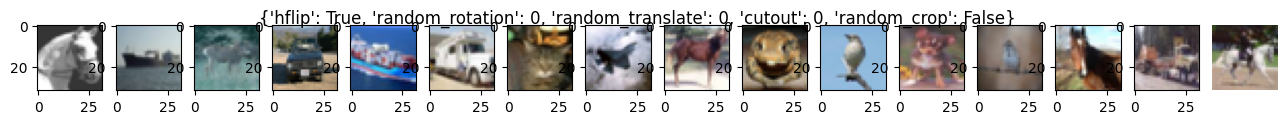

hflip


In [4]:
sample_dl(hflip=True)
print("hflip")

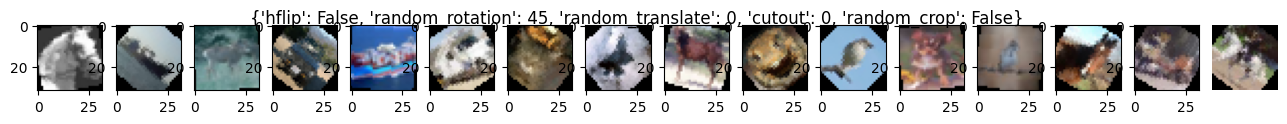

rotate


In [5]:
sample_dl(random_rotation=45)
print("rotate")

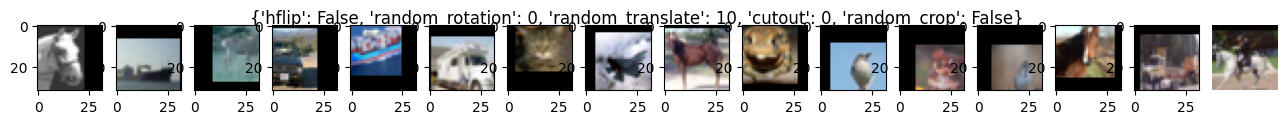

translate


In [6]:
sample_dl(random_translate=10)
print("translate")

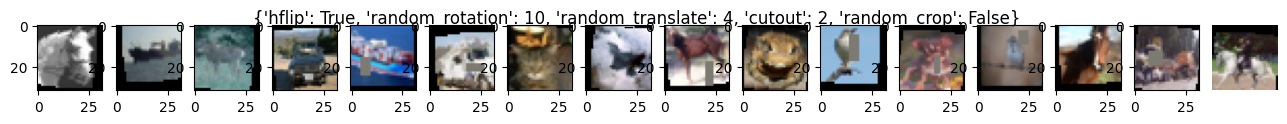

everything


In [7]:
images, labels = sample_dl(hflip=True, random_rotation=10, random_translate=4, cutout=2)
# save this tensor for future reference
np.savez("data_batch.npz", images=images, labels=labels)
print("everything")